<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open('estados-bruto.xml', mode = 'r'), 'lxml')

In [ ]:
# visualize os resultados

fonte

In [ ]:
# manipule os dados

# lista estados

estados = fonte.find_all('nome')
lista_estados = []

for estado in estados:
  nome = estado.text
  lista_estados.append(nome)

# lista siglas

siglas = fonte.find_all('sigla')
lista_siglas = []

for sigla in siglas:
  sg = sigla.text
  lista_siglas.append(sg)

# lista regiao

regioes = fonte.find_all('regiao')
lista_regiao = []

for regiao in regioes:
  rg = regiao.text
  lista_regiao.append(rg)

#juntando as listas

lista_principal = []

n = int(len(lista_estados))

for i in range(n):
  listinha = []
  listinha.append(lista_estados[i])
  listinha.append(lista_siglas[i])
  listinha.append(lista_regiao[i])
  lista_principal.append(listinha)

print(lista_principal)

In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import csv

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open(file='./estados-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerows([['estado','sigla','regiao']]+ (lista_principal))

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte_df = pd.read_csv('cidades-bruto.csv', sep=',')

In [ ]:
# visualize os resultados

fonte_df

In [ ]:
# manipule os dados

fonte_df = fonte_df.query('Censo == 2010')[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]
fonte_df

In [ ]:
#renomeando as colunas

fonte_df = fonte_df.rename(
    columns={
      "UF": "estado",
      "nome": "cidade",
      "Pop_est_2009": "populacao",
      "PIB": "pib",
      "PIB_percapita": "pib_percapita"
      }
)

# Removendo acentos para juntar os dataframes:

fonte_df['estado'] = fonte_df['estado'].apply(lambda estado: 'PIAUI' if estado == 'PIAUÍ' else estado)
fonte_df['estado'] = fonte_df['estado'].apply(lambda estado: 'GOIAS' if estado == 'GOIÁS' else estado)
fonte_df['estado'] = fonte_df['estado'].apply(lambda estado: 'SAO PAULO' if estado == 'SÃO PAULO' else estado)
fonte_df['estado'] = fonte_df['estado'].apply(lambda estado: 'PARAIBA' if estado == 'PARAÍBA' else estado)
fonte_df['estado'] = fonte_df['estado'].apply(lambda estado: 'CEARA' if estado == 'CEARÁ' else estado)
fonte_df['estado'] = fonte_df['estado'].apply(lambda estado: 'PARANA' if estado == 'PARANÁ' else estado)
fonte_df['estado'] = fonte_df['estado'].apply(lambda estado: 'PARA' if estado == 'PARÁ' else estado)
fonte_df['estado'] = fonte_df['estado'].apply(lambda estado: 'MARANHAO' if estado == 'MARANHÃO' else estado)
fonte_df['estado'] = fonte_df['estado'].apply(lambda estado: 'AMAPA' if estado == 'AMAPÁ' else estado)
fonte_df['estado'] = fonte_df['estado'].apply(lambda estado: 'RONDONIA' if estado == 'RONDÔNIA' else estado)


In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

fonte_df.to_csv('cidade-limpo.csv', index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3

estados_df = pd.read_csv('estados-limpo.csv', sep=';')
cidades_df = pd.read_csv('cidade-limpo.csv', sep=',')

brasil_df = pd.merge(left = cidades_df, right = estados_df, on='estado', how='inner')

brasil_df = brasil_df.fillna('')
brasil_df.to_csv('brasil.csv', index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1

brasil_df = pd.read_csv('brasil.csv', encoding='utf-8')

brasil_df

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5498,AMAPA,Serra do Navio,3982,1.097953e+05,27572.900391,AP,NORTE
5499,AMAPA,Ferreira Gomes,5475,6.993773e+04,12774.009766,AP,NORTE
5500,AMAPA,Tartarugalzinho,13769,1.199880e+05,8714.360352,AP,NORTE
5501,AMAPA,Macapá,366484,4.679694e+06,12769.160156,AP,NORTE


### **2.2. Análise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta
brasil_df.sort_values(by=['populacao'], ascending=False).head(n=10)

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
3271,SAO PAULO,São Paulo,11037593,389317152.0,35271.929688,SP,SUDESTE
4504,RIO DE JANEIRO,Rio de Janeiro,6186710,175739344.0,28405.949219,RJ,SUDESTE
44,BAHIA,Salvador,2998056,32824228.0,10948.500000,BA,NORDESTE
5502,DISTRITO FEDERAL,Brasília,2606885,131487264.0,50438.460938,DF,CENTRO-OESTE
4221,CEARA,Fortaleza,2505552,31789186.0,12687.500000,CE,NORDESTE
1735,MINAS GERAIS,Belo Horizonte,2452617,44595204.0,18182.699219,MG,SUDESTE
4849,PARANA,Curitiba,1851215,45762420.0,24720.210938,PR,SUL
3720,AMAZONAS,Manaus,1738641,40486108.0,23286.060547,AM,NORTE
2435,PERNAMBUCO,Recife,1561659,24835340.0,15903.179688,PE,NORDESTE
2624,PARA,Belém,1437600,16526989.0,11496.240234,PA,NORTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta
nordeste_df = brasil_df.query('regiao == "NORDESTE"')
nordeste_df.sort_values(by=['pib_percapita']).head()

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
4464,MARANHAO,São Vicente Ferrer,20463,39492.960938,1929.969971,MA,NORDESTE
4359,MARANHAO,Cajapió,10337,22781.035156,2203.830078,MA,NORDESTE
1848,PIAUI,Dom Inocêncio,10795,25457.230469,2358.239990,PI,NORDESTE
4483,MARANHAO,Timbiras,26909,63724.851562,2368.159912,MA,NORDESTE
4380,MARANHAO,Axixá,15203,36745.226562,2416.969971,MA,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta
sp_df = brasil_df.query('estado == "SAO PAULO"')
sp_df.sort_values(by=['pib'], ascending = False).head(n=15)

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
3271,SAO PAULO,São Paulo,11037593,389317152.0,35271.929688,SP,SUDESTE
3223,SAO PAULO,Guarulhos,1299283,32473828.0,24993.650391,SP,SUDESTE
3340,SAO PAULO,Campinas,1064669,31654720.0,29731.980469,SP,SUDESTE
3106,SAO PAULO,Osasco,718646,31616452.0,43994.468750,SP,SUDESTE
2810,SAO PAULO,São Bernardo do Campo,810979,28935768.0,35680.050781,SP,SUDESTE
3344,SAO PAULO,Barueri,270173,26908070.0,99595.703125,SP,SUDESTE
2768,SAO PAULO,Santos,417098,22546134.0,54054.761719,SP,SUDESTE
2994,SAO PAULO,São José dos Campos,615871,22018042.0,35751.058594,SP,SUDESTE
3014,SAO PAULO,Jundiaí,349929,16585137.0,47395.718750,SP,SUDESTE
2816,SAO PAULO,Santo André,673396,14709603.0,21843.910156,SP,SUDESTE


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
# código para responder a pergunta
sc_df = brasil_df.query('estado == "SANTA CATARINA"')
sc_df['pib'].sum()

# código alternativo
sc_df = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']['pib'].agg('sum')
sc_df

129806256.75195317

 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta
sul_df = brasil_df.query('regiao == "SUL"')
sul_df['populacao'].sum()

27719118

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta
matogrosso_df = brasil_df.query('estado == "MATO GROSSO DO SUL"')
matogrosso_df['pib_percapita'].mean()

14458.896859975644

 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta
brasil_df['populacao'].sum()

189672218

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: title={'center': 'As 10 cidades menos populosas do Brasil'}, xlabel='cidade'>

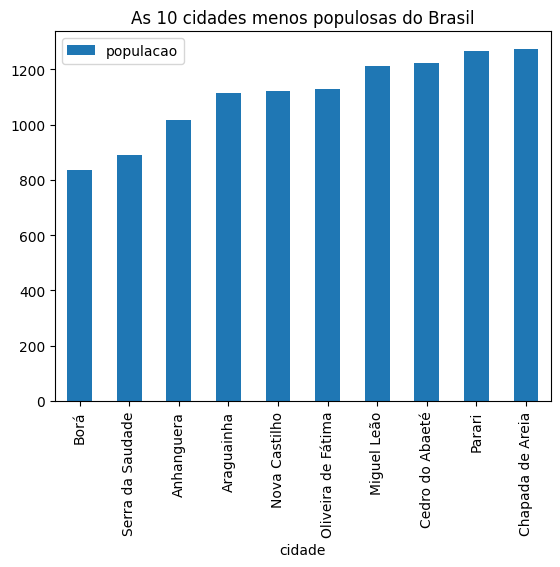

In [ ]:
# código para gerar a visualização

cidades_menos_populosas = brasil_df.sort_values('populacao', ascending=True).head(10)

cidades_menos_populosas.plot.bar(x='cidade', y='populacao',title='As 10 cidades menos populosas do Brasil')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: title={'center': 'Proporção da população do Brasil por região'}, ylabel='populacao'>

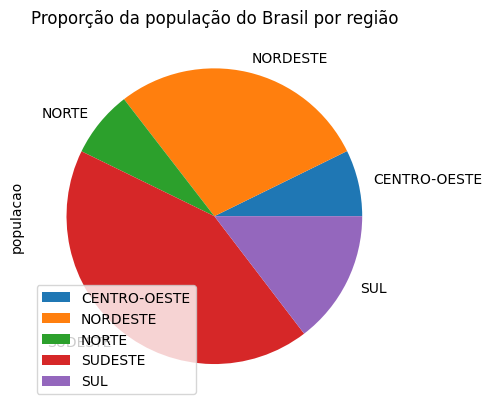

In [ ]:
# código para gerar a visualização
populacao_por_regiao_df = brasil_df[['regiao','populacao']].groupby('regiao').agg('sum')

populacao_por_regiao_df.plot.pie(y='populacao', title='Proporção da população do Brasil por região')